<a href="https://colab.research.google.com/github/ipreencekmr/IIT-M/blob/main/MLC_B8_C1_Project_PrinceKumarSharma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective

Using EDA, help Stack Overflow implement the following features in its web application: 

1. When a user raises a question with a data science tag ('**python**', '**r**', '**matlab**', '**sas**', '**excel**', '**sql**'), Stack Overflow sends the notification to the relevant users.

2. When a user provides a data science tag ('**python**', '**r**', '**matlab**', '**sas**', '**excel**', '**sql**') to their question, Stack Overflow should come up with the expected approximate time to get it answered.

3. While a user raises a question, Stack Overflow wants to provide some suggestions to the users to answer their queries quickly.

## Approach

1. Load data set and smoke analysis
  - Check shape and size
  - Check data types
  - Check null count
  - Check null percentage
  - Check statistics
  - Check duplicates
2. Data Cleaning and Manipulation
  - Handle Missing
  - Handle Duplicates
  - Handle Outlier
  - Standardize values
  - Derived Metrics
3. Data Analysis
  - Univariate, Bi-Variate and Segmented Analysis
  - Multivariate Analysis
4. Store Results to RDS

## 1. Load data set and smoke analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
quesPath = 'https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Questions.csv'
ansPath = 'https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Answers.csv'
tagPath = 'https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Tags.csv'
userPath = 'https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Users.csv'

In [ ]:
ques_df = pd.read_csv(quesPath, encoding = "ISO-8859-1") #load questions dataframe

In [ ]:
ans_df = pd.read_csv(ansPath, encoding = "ISO-8859-1") #load answer dataframe

In [ ]:
tags_df = pd.read_csv(tagPath) #load tags dataframe

In [ ]:
users_df = pd.read_csv(userPath, usecols=range(1,9)) #load users dataframe

In [ ]:
ques_df.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [ ]:
ans_df.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [ ]:
tags_df.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [ ]:
users_df.head()

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
1,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
2,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
3,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
4,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547


#### 1.1 Check shape and size

In [ ]:
ques_df.shape, ques_df.size

((1264216, 7), 8849512)

In [ ]:
ans_df.shape, ans_df.size

((2014516, 6), 12087096)

In [ ]:
tags_df.shape, tags_df.size

((3750994, 2), 7501988)

In [ ]:
users_df.shape, users_df.size

((1990480, 8), 15923840)

#### 1.2 Check data types

In [ ]:
ques_df.dtypes

Id                int64
OwnerUserId     float64
CreationDate     object
ClosedDate       object
Score             int64
Title            object
Body             object
dtype: object

In [ ]:
ans_df.dtypes

Id                int64
OwnerUserId     float64
CreationDate     object
ParentId          int64
Score             int64
Body             object
dtype: object

In [ ]:
tags_df.dtypes

Id      int64
Tag    object
dtype: object

In [ ]:
users_df.dtypes

id                   int64
display_name        object
creation_date       object
last_access_date    object
reputation           int64
up_votes             int64
down_votes           int64
views                int64
dtype: object

#### 1.3 Check null count

In [ ]:
ques_df.isnull().sum()

Id                    0
OwnerUserId       14454
CreationDate          0
ClosedDate      1208257
Score                 0
Title                 0
Body                  0
dtype: int64

In [ ]:
ans_df.isnull().sum()

Id                  0
OwnerUserId     13200
CreationDate        0
ParentId            0
Score               0
Body                0
dtype: int64

In [ ]:
tags_df.isnull().sum()

Id        0
Tag    1113
dtype: int64

In [ ]:
users_df.isnull().sum()

id                    0
display_name        136
creation_date         0
last_access_date      0
reputation            0
up_votes              0
down_votes            0
views                 0
dtype: int64

#### 1.4 Check null percentage

In [ ]:
round(ques_df.isnull().sum()*100/len(ques_df), 2)

Id               0.00
OwnerUserId      1.14
CreationDate     0.00
ClosedDate      95.57
Score            0.00
Title            0.00
Body             0.00
dtype: float64

In [ ]:
round(ans_df.isnull().sum()*100/len(ans_df), 2)

Id              0.00
OwnerUserId     0.66
CreationDate    0.00
ParentId        0.00
Score           0.00
Body            0.00
dtype: float64

In [ ]:
round(tags_df.isnull().sum()*100/len(tags_df), 2)

Id     0.00
Tag    0.03
dtype: float64

In [ ]:
round(users_df.isnull().sum()*100/len(users_df), 2)

id                  0.00
display_name        0.01
creation_date       0.00
last_access_date    0.00
reputation          0.00
up_votes            0.00
down_votes          0.00
views               0.00
dtype: float64

#### 1.5 Check statistics

In [ ]:
round(ques_df.describe(), 2)

,Id,OwnerUserId,Score
count,1264216.00,1249762.00,1264216.00
mean,21327450.78,2155177.16,1.78
std,11514450.58,1801265.44,13.66
min,80.00,1.00,-73.00
25%,11425985.00,658911.00,0.00
50%,21725415.00,1611830.00,0.00
75%,31545422.50,3353792.25,1.00
max,40143380.00,7046594.00,5190.00


In [ ]:
round(ans_df.describe(), 2)

,Id,OwnerUserId,ParentId,Score
count,2014516.00,2001316.00,2014516.00,2014516.00
mean,19154897.46,1487613.39,18083895.76,2.48
std,11687126.93,1549051.24,11691522.04,15.91
min,92.00,1.00,80.00,-42.00
25%,8854490.00,281868.00,7692900.00,0.00
50%,18662456.50,954643.00,17124045.00,1.00
75%,29297555.75,2197071.75,28049772.50,2.00
max,40143389.00,7045028.00,40143190.00,5718.00


In [ ]:
round(tags_df.describe(), 2)

,Id
count,3750994.00
mean,21482849.84
std,11472457.97
min,80.00
25%,11644302.50
50%,21962485.00
75%,31645090.00
max,40143380.00


In [ ]:
round(users_df.describe(), 2)

,id,reputation,up_votes,down_votes,views
count,1990480.00,1990480.00,1990480.00,1990480.00,1990480.00
mean,1480736.92,45455.04,1539.70,821.24,9450.82
std,1543848.19,122637.78,3494.25,4199.03,78775.72
min,1.00,1.00,0.00,0.00,0.00
25%,279761.75,931.00,58.00,2.00,109.00
50%,949476.00,5042.00,353.00,18.00,529.00
75%,2183668.50,28061.00,1470.00,149.00,2675.00
max,7045028.00,1128126.00,100520.00,74955.00,1835157.00


#### 1.6 Check Duplicates

In [ ]:
print('Question Duplicacy: ',(ques_df.Id.count() != len(ques_df.Id.unique())))
print('Answer Duplicacy: ',(ans_df.Id.count() != len(ans_df.Id.unique())))
print('Users Duplicacy: ',(users_df.id.count() != len(users_df.id.unique())))

Question Duplicacy:  False
Answer Duplicacy:  False
Users Duplicacy:  True


 ---
 **Observations**
   - Questions have null values in OwnerUserId(1.14%) and ClosedDate(95.57%) 
   - Answers has null value in OwnerUserId(0.66%)
   - Tags have 0.03% null tags
   - Users have null values in display_name (0.01%)
   - In Questions dataset OwnersUserId mean > median (the distribution is positively skewed). In terms of Score, it is also positively skewed distribution. Heavy difference in 75th percentile and max value for Score.
   - Answers dataset follows the same norm as questions dataset. 
   - Chances of potential outliers where difference between 75th percentile with max value or 25th percentile with min value is huge.
   - Tags seem to be have normal distribution.
   - Except down votes, all the fields of users dataframe is positively skewed.
   - Duplicate entries in users dataset

### 2. Data Cleaning and Manipulation

#### 2.1 Handling Missing Values

- We have observed that parentId in answer dataset represents QuestionId in question dataset. Hence, we will make OwnerUserId
- We have 95.57% null values in ClosedDate for Questions dataset. ClosedDate having null values are valid because ClosedDate is applicable only on those questions which is not eligible for further answers. **We will leave ClosedDate it as it is**.
- We can see that OwnerUserId both in Questions as well as Answer dataset is null upto 1.14% and 0.66% respectively. There is a provision in stackoverflow, due to violation of rules, moderators can delete violators userId and user himself can also delete his account. In that case having null in OwnerUserId is valid.**We will replace OwnerUserId having null values with 0**.
- Tags dataset has null values which is negligible. **We will drop rows having null entries.**
- Users dataset has null values in display_names but do have user_id, means user is valid. We can also drop these rows as negligible in amount. 
- Users are duplicated in users dataset. **We will drop duplicate entries**



In [ ]:
ques_df.OwnerUserId.replace(np.nan, value=0, inplace=True)

In [ ]:
ques_df.isnull().sum() #check null values again

Id                    0
OwnerUserId           0
CreationDate          0
ClosedDate      1208257
Score                 0
Title                 0
Body                  0
dtype: int64

In [ ]:
ans_df.OwnerUserId.replace(np.nan, value=0, inplace=True)

In [ ]:
ans_df.isnull().sum()

Id              0
OwnerUserId     0
CreationDate    0
ParentId        0
Score           0
Body            0
dtype: int64

In [ ]:
tags_df = tags_df[~tags_df.Tag.isnull()] #drop tags having null values

In [ ]:
tags_df.isnull().sum()

Id     0
Tag    0
dtype: int64

In [ ]:
users_df.isnull().sum()

id                    0
display_name        136
creation_date         0
last_access_date      0
reputation            0
up_votes              0
down_votes            0
views                 0
dtype: int64

In [ ]:
users_df[users_df.display_name.isnull()].groupby('id').count().count() 

display_name        24
creation_date       24
last_access_date    24
reputation          24
up_votes            24
down_votes          24
views               24
dtype: int64

 *24 users have display name as null.*

In [ ]:
round((24 * 100)/len(users_df.id.unique()), 2)

0.01

*0.01% of the users have null display name*

In [ ]:
users_df = users_df[~users_df.display_name.isnull()] #drop users having display name null

In [ ]:
users_df.isnull().sum()

id                  0
display_name        0
creation_date       0
last_access_date    0
reputation          0
up_votes            0
down_votes          0
views               0
dtype: int64

#### 2.2 Handle Duplicates


As we have already observed that users dataset has duplicate entries. **We will drop duplicate entries.**

In [ ]:
users_df.count()

id                  1990344
display_name        1990344
creation_date       1990344
last_access_date    1990344
reputation          1990344
up_votes            1990344
down_votes          1990344
views               1990344
dtype: int64

In [ ]:
#dropping duplicate entries by matching id and keeping first record of that id
users_df.drop_duplicates(subset="id",keep="first", inplace=True)

In [ ]:
users_df.count()

id                  465436
display_name        465436
creation_date       465436
last_access_date    465436
reputation          465436
up_votes            465436
down_votes          465436
views               465436
dtype: int64

#### 2.3 Handler Outlier

*To handle outlier, we will be using **upto 99 percentile for upper bound OR up to 1% for lower bound** capping and **imputation with median** if required.*

In [ ]:
users_df.head()

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
27,1109,Theo,2008-08-12 12:16:58.61 UTC,2019-08-31 11:39:52.28 UTC,116072,457,136,6905
85,364174,stats,2010-06-11 03:34:57.137 UTC,2019-08-29 18:37:35.027 UTC,325,25,1,60
87,61,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
97,20709,Black Horus,2008-09-22 20:03:39.71 UTC,2019-09-01 01:17:38.133 UTC,978,73,2,96


In [ ]:
def display_users_boxplot(usr_df):
  plt.figure(figsize=(10,8))
  plt.subplot(2, 4, 1)
  plt.title('Reputation')
  plt.ylabel('Frequency')
  sns.boxplot(data=usr_df, x='reputation')
  plt.subplot(2, 4, 2)
  plt.title('Up Votes')
  sns.boxplot(data=usr_df, x='up_votes')
  plt.subplot(2, 4, 3)
  plt.title('Down Votes')
  sns.boxplot(data=usr_df, x='down_votes')
  plt.subplot(2, 4, 4)
  plt.title('Views')
  sns.boxplot(data=usr_df, x='views')
  plt.show()

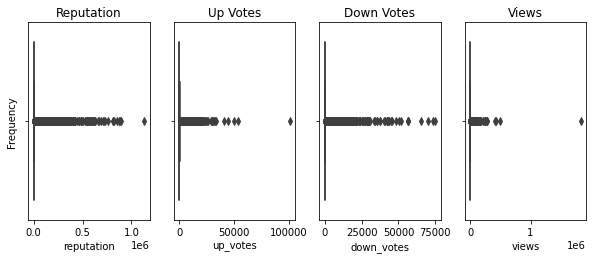

In [ ]:
display_users_boxplot(users_df)

In [ ]:
round(users_df.describe(), 1)

,id,reputation,up_votes,down_votes,views
count,465436.0,465436.0,465436.0,465436.0,465436.0
mean,2250120.3,1977.0,192.8,29.0,240.1
std,1789178.8,10989.2,640.4,515.6,3396.5
min,1.0,1.0,0.0,0.0,0.0
25%,766440.5,66.0,3.0,0.0,12.0
50%,1774460.5,353.0,26.0,0.0,45.0
75%,3478430.5,1165.0,130.0,5.0,144.0
max,7045028.0,1128126.0,100520.0,74955.0,1835157.0


In [ ]:
np.percentile(users_df.reputation, [99.0, 100.0])

array([  27382.6, 1128126. ])

In [ ]:
np.percentile(users_df.up_votes, [99.0, 100.0])

array([  2543.65, 100520.  ])

In [ ]:
np.percentile(users_df.down_votes, [99.0, 100.0])

array([  372., 74955.])

In [ ]:
np.round(np.percentile(users_df.views, [99.0, 100.0]), 2)

array([   2910.65, 1835157.  ])

In [ ]:
print('Total Records before capping: ', len(users_df))

Total Records before capping:  465436


In [ ]:
def cap_users(cap_users_df, percentile):
  cap_users_df = cap_users_df[users_df.reputation <= np.percentile(users_df.reputation, percentile)]
  cap_users_df = cap_users_df[users_df.up_votes <= np.percentile(users_df.up_votes, percentile)]
  cap_users_df = cap_users_df[users_df.down_votes <= np.percentile(users_df.down_votes, percentile)]
  cap_users_df = cap_users_df[users_df.views <= np.percentile(users_df.views, percentile)]
  return cap_users_df

In [ ]:
cap_users_df = cap_users(users_df.copy(), 99.0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [ ]:
print('Total Records After Capping: ', len(cap_users_df))

Total Records After Capping:  454191


In [ ]:
print('Users record dropped', len(users_df)-len(cap_users_df))

Users record dropped 11245


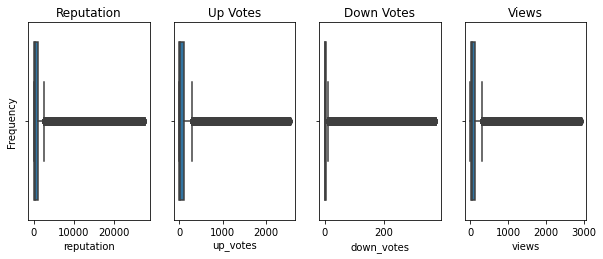

In [ ]:
display_users_boxplot(cap_users_df)

Now we can see continuity of reasonable values in the box plots

In [ ]:
round(ques_df.describe(), 1)

,Id,OwnerUserId,Score
count,1264216.0,1264216.0,1264216.0
mean,21327450.8,2130536.6,1.8
std,11514450.6,1805535.7,13.7
min,80.0,0.0,-73.0
25%,11425985.0,630908.0,0.0
50%,21725415.0,1581147.0,0.0
75%,31545422.5,3326334.2,1.0
max,40143380.0,7046594.0,5190.0


In [ ]:
def display_ques_boxplot(q_df):
  plt.figure(figsize=(10,8))
  plt.subplot(2, 4, 1)
  plt.title('Question Id')
  plt.ylabel('Frequency')
  sns.boxplot(data=q_df, x='Id')
  plt.subplot(2, 4, 2)
  plt.title('User Id')
  sns.boxplot(data=q_df, x='OwnerUserId')
  plt.subplot(2, 4, 3)
  plt.title('Score')
  sns.boxplot(data=q_df, x='Score')
  plt.show()

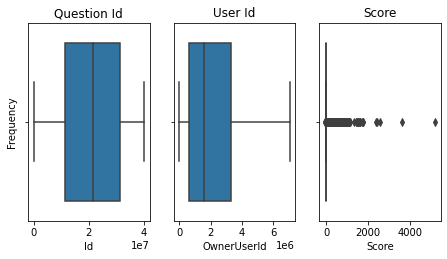

In [ ]:
display_ques_boxplot(ques_df)

In [ ]:
cap_ques_df = ques_df[ques_df.Score <= np.percentile(ques_df.Score, 99.0)].copy()

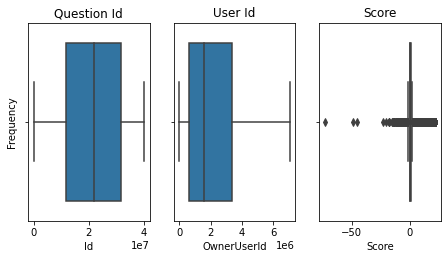

In [ ]:
display_ques_boxplot(cap_ques_df)

As we can see in box plot, there are negative outliers also. We need to cap them also.

In [ ]:
np.percentile(cap_ques_df.Score, [0.0, 0.1, 0.5])

array([-73.,  -6.,  -4.])

We will cap it from **0.1 percentile** from lower bound

In [ ]:
#cap both lower and upper side from ques_df
cap_ques_df = ques_df[(ques_df.Score <= np.percentile(ques_df.Score, 99.0)) \
                          & (ques_df.Score >= np.percentile(ques_df.Score, 0.1))].copy()

In [ ]:
print('Before capping questions record ', len(ques_df))
print('After capping questions record ', len(cap_ques_df))
print('Records not being used ', len(ques_df) - len(cap_ques_df))

Before capping questions record  1264216
After capping questions record  1250810
Records not being used  13406


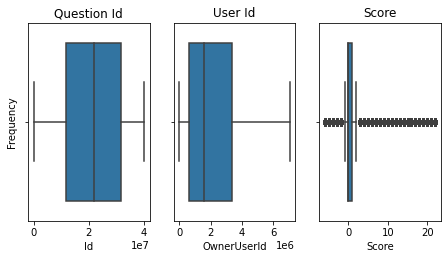

In [ ]:
display_ques_boxplot(cap_ques_df)

Now, we have some level of continuity in Score for question dataset

In [ ]:
round(ans_df.describe(), 2)

,Id,OwnerUserId,ParentId,Score
count,2014516.00,2014516.00,2014516.00,2014516.00
mean,19154897.46,1477865.89,18083895.76,2.48
std,11687126.93,1548625.93,11691522.04,15.91
min,92.00,0.00,80.00,-42.00
25%,8854490.00,270591.00,7692900.00,0.00
50%,18662456.50,941776.00,17124045.00,1.00
75%,29297555.75,2183804.00,28049772.50,2.00
max,40143389.00,7045028.00,40143190.00,5718.00


Score seems to be highly biased as we can see the difference between max and 75th percentile for Score value

In [ ]:
def display_ans_boxplot(a_df):
  plt.figure(figsize=(10,8))
  plt.subplot(2, 4, 1)
  plt.title('Answer Id')
  plt.ylabel('Frequency')
  sns.boxplot(data=a_df, x='Id')
  plt.subplot(2, 4, 2)
  plt.title('User Id')
  sns.boxplot(data=a_df, x='OwnerUserId')
  plt.subplot(2, 4, 3)
  plt.title('Parent Id')
  sns.boxplot(data=a_df, x='ParentId')
  plt.subplot(2, 4, 4)
  plt.title('Score')
  sns.boxplot(data=a_df, x='Score')
  plt.show()

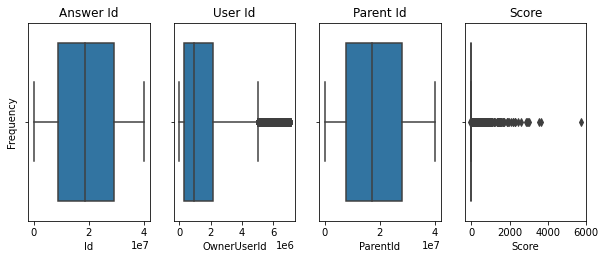

In [ ]:
display_ans_boxplot(ans_df)

In [ ]:
np.percentile(ans_df.Score, [99.0, 100.0])

array([  28., 5718.])

In [ ]:
cap_ans_df = ans_df[ans_df.Score <= np.percentile(ans_df.Score, 99.0)].copy()

In [ ]:
print('Before capping answer record ', len(ans_df))
print('After capping answer record ', len(cap_ans_df))
print('Records not being used ', len(ans_df) - len(cap_ans_df))

Before capping answer record  2014516
After capping answer record  1995186
Records not being used  19330


#### 2.4 Standardize values

In [ ]:
cap_ques_df.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
6,470,71.0,2008-08-02T15:11:47Z,2016-03-26T05:23:29Z,13,Homegrown consumption of web services,<p>I've been writing a few web services for a ...
7,580,91.0,2008-08-02T23:30:59Z,NaN,21,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...
9,810,233.0,2008-08-03T20:35:01Z,NaN,9,Visual Studio Setup Project - Per User Registr...,<p>I'm trying to maintain a Setup Project in <...
11,1010,67.0,2008-08-04T03:59:42Z,NaN,14,"How to get the value of built, encoded ViewState?",<p>I need to grab the base64-encoded represent...


In [ ]:
cap_ans_df.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [ ]:
cap_users_df.head()

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
85,364174,stats,2010-06-11 03:34:57.137 UTC,2019-08-29 18:37:35.027 UTC,325,25,1,60
87,61,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
97,20709,Black Horus,2008-09-22 20:03:39.71 UTC,2019-09-01 01:17:38.133 UTC,978,73,2,96
99,16012,JoelFan,2008-09-17 14:05:17.36 UTC,2019-08-25 04:38:51.397 UTC,19888,484,30,1823
105,12734,Kelly Adams,2008-09-16 15:27:55.78 UTC,2019-08-29 19:59:10.743 UTC,695,35,0,105


In [ ]:
len(tags_df.Tag.unique())

37034

*Standardise date format*  We are not going to use creation_date and last_access_date of users. But we can standardise them by following lines of code.

In [ ]:
#cap_users_df.creation_date = pd.to_datetime(cap_users_df.creation_date, utc=True).dt.strftime("%Y-%m-%dT%H:%M:%SZ")  #format='%Y-%m-%dT%H:%M:%SZ'

In [ ]:
#cap_users_df.last_access_date = pd.to_datetime(cap_users_df.last_access_date, utc=True).dt.strftime("%Y-%m-%dT%H:%M:%SZ")

In [ ]:
cap_users_df.head()

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
85,364174,stats,2010-06-11 03:34:57.137 UTC,2019-08-29 18:37:35.027 UTC,325,25,1,60
87,61,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
97,20709,Black Horus,2008-09-22 20:03:39.71 UTC,2019-09-01 01:17:38.133 UTC,978,73,2,96
99,16012,JoelFan,2008-09-17 14:05:17.36 UTC,2019-08-25 04:38:51.397 UTC,19888,484,30,1823
105,12734,Kelly Adams,2008-09-16 15:27:55.78 UTC,2019-08-29 19:59:10.743 UTC,695,35,0,105


#### 2.5 Derived metrics

In [ ]:
cap_ques_df.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
6,470,71.0,2008-08-02T15:11:47Z,2016-03-26T05:23:29Z,13,Homegrown consumption of web services,<p>I've been writing a few web services for a ...
7,580,91.0,2008-08-02T23:30:59Z,NaN,21,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...
9,810,233.0,2008-08-03T20:35:01Z,NaN,9,Visual Studio Setup Project - Per User Registr...,<p>I'm trying to maintain a Setup Project in <...
11,1010,67.0,2008-08-04T03:59:42Z,NaN,14,"How to get the value of built, encoded ViewState?",<p>I need to grab the base64-encoded represent...


In [ ]:
cap_ans_df.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [ ]:
#Total no of questions
cap_ques_df.count()

Id              1250810
OwnerUserId     1250810
CreationDate    1250810
ClosedDate        54526
Score           1250810
Title           1250810
Body            1250810
dtype: int64

In [ ]:
#Checking how many questions have answers
ans_count_df = cap_ans_df.groupby("ParentId")[['Id']].count()
print('Questions having answers: ',ans_count_df.count())
ans_count_df.head()

Questions having answers:  Id    1101056
dtype: int64


,Id
ParentId,
80,3
90,3
120,1
180,9
260,9


In [ ]:
ans_count_df.columns = ['Answers']

In [ ]:
ans_count_df.head()

,Answers
ParentId,
80,3
90,3
120,1
180,9
260,9


In [ ]:
#as we are focused on analysing questions, we will apply inner join because questions without answers aren't gonna help us predicting
cap_ques_df = pd.merge(left=cap_ques_df, right=ans_count_df, how='inner', left_on='Id', right_on='ParentId', suffixes=(False, False))
cap_ques_df.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Answers
0,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,1
1,470,71.0,2008-08-02T15:11:47Z,2016-03-26T05:23:29Z,13,Homegrown consumption of web services,<p>I've been writing a few web services for a ...,1
2,580,91.0,2008-08-02T23:30:59Z,NaN,21,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...,14
3,810,233.0,2008-08-03T20:35:01Z,NaN,9,Visual Studio Setup Project - Per User Registr...,<p>I'm trying to maintain a Setup Project in <...,4
4,1010,67.0,2008-08-04T03:59:42Z,NaN,14,"How to get the value of built, encoded ViewState?",<p>I need to grab the base64-encoded represent...,3


In [ ]:
cap_ques_df.count() #validate number of rows after merge (should be <= no of rows before merging)

Id              1088493
OwnerUserId     1088493
CreationDate    1088493
ClosedDate        45918
Score           1088493
Title           1088493
Body            1088493
Answers         1088493
dtype: int64

In [ ]:
#check null values for Questions again
cap_ques_df.isnull().sum()

Id                    0
OwnerUserId           0
CreationDate          0
ClosedDate      1042575
Score                 0
Title                 0
Body                  0
Answers               0
dtype: int64

No null value as expected except ClosedDate (expected)

In [ ]:
tags_df.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [ ]:
#Check if Tags has non string value in it
tags_df[tags_df.Tag.apply(type) != str].any()

Id     False
Tag    False
dtype: bool

In [ ]:
#we are combining tags for same question id into tuple
tags_by_id_df = tags_df.groupby('Id')['Tag'].apply(tuple).reset_index()
tags_by_id_df.columns = ['QuestionId', 'Tags']
tags_by_id_df.head()

,QuestionId,Tags
0,80,"(flex, actionscript-3, air)"
1,90,"(svn, tortoisesvn, branch, branching-and-merging)"
2,120,"(sql, asp.net, sitemap)"
3,180,"(algorithm, language-agnostic, colors, color-s..."
4,260,"(c#, .net, scripting, compiler-construction)"


**Merge tags to respective questions and drop QuestionId appended by merge**

In [ ]:
cap_ques_df = pd.merge(left=cap_ques_df, right=tags_by_id_df, \
                       how='inner', \
                       left_on='Id', \
                       right_on='QuestionId', \
                       suffixes=(False, False)).drop('QuestionId', axis=1)
cap_ques_df.head()

In [ ]:
#check number of records in question dataset again to validate correct entry
cap_ques_df.count()

Id              1088491
OwnerUserId     1088491
CreationDate    1088491
ClosedDate        45918
Score           1088491
Title           1088491
Body            1088491
Answers         1088491
Tags            1088491
dtype: int64

No null entry verified

*Now we have **tags** and **number of answers** per question mapped with question dataset.* 

Next we will derive

- First Answer Time (**FA_Dt**) along with User who answered (**FA_Usr**) and score he received (**FA_Score**)
- Last Answer Time (**LA_Dt**) along with User who answered (**FA_Usr**) and score he received (**LA_Score**)
- Avg Time to Answer (**AVG_Dt**)


In [ ]:
cap_ans_df.head(3)

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...


In [ ]:
fa_dt_df = cap_ans_df.groupby('ParentId').agg({'CreationDate':min}).reset_index()
fa_df = pd.merge(left=fa_dt_df, \
                 right=cap_ans_df[['OwnerUserId','CreationDate','ParentId','Score']], \
                 how='inner', \
                 on=['ParentId','CreationDate'])

fa_df.columns = ["QuestionId", "FA_Dt", 'FA_Usr', 'FA_Score']
fa_df.head(3)

,QuestionId,FA_Dt,FA_Usr,FA_Score
0,80,2008-08-01T16:09:47Z,26.0,12
1,90,2008-08-01T14:45:37Z,61.0,13
2,120,2008-09-23T22:41:11Z,12734.0,9


*Verify the merge by matching question Ids and min value of createDate*

In [ ]:
cap_ans_df[cap_ans_df.ParentId.isin([80, 90, 120])]\
.sort_values(by=['ParentId','CreationDate'])\
[['ParentId','CreationDate','OwnerUserId','Score']]

,ParentId,CreationDate,OwnerUserId,Score
1,80,2008-08-01T16:09:47Z,26.0,12
336,80,2008-08-13T16:09:09Z,1109.0,6
219787,80,2010-09-22T15:37:30Z,364174.0,1
0,90,2008-08-01T14:45:37Z,61.0,13
10748,90,2008-10-14T18:41:45Z,20709.0,2
85572,90,2009-09-23T15:40:46Z,16012.0,19
6436,120,2008-09-23T22:41:11Z,12734.0,9


*Successfully verified and for ParentId 90 we are getting 13 as Score, date as 2008-08-01 which is minimum and userId as 61.0*

**Lets perform the same for LA_Dt as well**

In [ ]:
la_dt_df = cap_ans_df.groupby('ParentId').agg({'CreationDate':max}).reset_index()
la_df = pd.merge(left=la_dt_df, right=cap_ans_df[['OwnerUserId','CreationDate','ParentId','Score']], how='inner', on=['ParentId','CreationDate'])
la_df.columns = ["QuestionId", "LA_Dt", 'LA_Usr', 'LA_Score']
la_df.head(3)

,QuestionId,LA_Dt,LA_Usr,LA_Score
0,80,2010-09-22T15:37:30Z,364174.0,1
1,90,2009-09-23T15:40:46Z,16012.0,19
2,120,2008-09-23T22:41:11Z,12734.0,9


*Verify the same by getting answers for question ids 80,90 and 120*

In [ ]:
cap_ans_df[cap_ans_df.ParentId.isin([80, 90, 120])].sort_values(by=['ParentId','CreationDate'])[['ParentId','CreationDate','OwnerUserId','Score']]

,ParentId,CreationDate,OwnerUserId,Score
1,80,2008-08-01T16:09:47Z,26.0,12
336,80,2008-08-13T16:09:09Z,1109.0,6
219787,80,2010-09-22T15:37:30Z,364174.0,1
0,90,2008-08-01T14:45:37Z,61.0,13
10748,90,2008-10-14T18:41:45Z,20709.0,2
85572,90,2009-09-23T15:40:46Z,16012.0,19
6436,120,2008-09-23T22:41:11Z,12734.0,9


*Successfully verified by matching ParentId and max value for creationDate.*

Perform the same for average time a question takes to get an answer **AVG_Dt**

In [ ]:
#converting date string to timestamp
cap_ans_df['DT'] = pd.to_datetime(cap_ans_df.CreationDate).values.astype(np.int64)

In [ ]:
#getting average of time stamp and converting back to standard formatted date string
avg_dt_df = cap_ans_df.groupby('ParentId')[['DT']].mean()
avg_dt_df.loc[:,'DT'] = avg_dt_df.DT.apply(lambda x:pd.to_datetime(x).strftime("%Y-%m-%dT%H:%M:%SZ"))
avg_dt_df.head(3)

,DT
ParentId,
80,2009-04-23T07:58:48Z
90,2009-01-12T16:22:42Z
120,2008-09-23T22:41:11Z


In [ ]:
avg_df = avg_dt_df.reset_index()
avg_df.columns = ['QuestionId','AVG_Dt']
avg_df.head(3)

,QuestionId,AVG_Dt
0,80,2009-04-23T07:58:48Z
1,90,2009-01-12T16:22:42Z
2,120,2008-09-23T22:41:11Z


*Verify the same by taking mean for one of the QuestionId*

In [ ]:
date_values = cap_ans_df[cap_ans_df.ParentId == 80]['CreationDate']
time_stamps = pd.to_datetime(date_values.values).astype(np.int64)
print('time stamps for QuestionId 80 ', time_stamps)
mean_date_time = pd.to_datetime(np.mean(time_stamps)).strftime("%Y-%m-%dT%H:%M:%SZ")
print('Average date time for QuestionId 80: ', mean_date_time)

time stamps for QuestionId 80  Int64Index([1217606987000000000, 1218643749000000000, 1285169850000000000], dtype='int64')
Average date time for QuestionId 80:  2009-04-23T07:58:48Z


*Hence, we verified our successfull answer dataset merge*

**Verify the count for for new dataframes as compared to earlier dataframe**

In [ ]:
cap_ans_df.groupby('ParentId')['Id'].count().size

1101056

In [ ]:
#verify first answer dataset count
fa_df.count()

QuestionId    1101662
FA_Dt         1101662
FA_Usr        1101662
FA_Score      1101662
dtype: int64

In [ ]:
la_df.count()

QuestionId    1101392
LA_Dt         1101392
LA_Usr        1101392
LA_Score      1101392
dtype: int64

In [ ]:
avg_df.count()

QuestionId    1101056
AVG_Dt        1101056
dtype: int64

As we can see there are discrepancy in the dataset count 
- For AVG_Df its 1101056
- For FA_Dt its 1101662
- For LA_Dt its 1101392
- Actual Group By count 1101056

Why So?

These are valid data entry. 

*In case of first and last answer date. Different users can post an answer on the same date for same question. In such case if time matches for the same Question Id, It repeats. However, after merging these datasets together we will again group by QuestionId and opt for first row to overcome this problem.*

After final merge and groupby Question Id, total count should be **1101056**

**Lets merge these three derived answer datasets by question Id**

In [ ]:
first_merge_df = pd.merge(left=fa_df, right=la_df, on='QuestionId', how='inner')
first_merge_df.head(3)

,QuestionId,FA_Dt,FA_Usr,FA_Score,LA_Dt,LA_Usr,LA_Score
0,80,2008-08-01T16:09:47Z,26.0,12,2010-09-22T15:37:30Z,364174.0,1
1,90,2008-08-01T14:45:37Z,61.0,13,2009-09-23T15:40:46Z,16012.0,19
2,120,2008-09-23T22:41:11Z,12734.0,9,2008-09-23T22:41:11Z,12734.0,9


In [ ]:
second_merge_df = pd.merge(left=first_merge_df, right=avg_df, on='QuestionId', how='inner')
second_merge_df.head(3)

,QuestionId,FA_Dt,FA_Usr,FA_Score,LA_Dt,LA_Usr,LA_Score,AVG_Dt
0,80,2008-08-01T16:09:47Z,26.0,12,2010-09-22T15:37:30Z,364174.0,1,2009-04-23T07:58:48Z
1,90,2008-08-01T14:45:37Z,61.0,13,2009-09-23T15:40:46Z,16012.0,19,2009-01-12T16:22:42Z
2,120,2008-09-23T22:41:11Z,12734.0,9,2008-09-23T22:41:11Z,12734.0,9,2008-09-23T22:41:11Z


In [ ]:
derived_ans_df = second_merge_df.groupby('QuestionId').first().reset_index()
derived_ans_df.head()

,QuestionId,FA_Dt,FA_Usr,FA_Score,LA_Dt,LA_Usr,LA_Score,AVG_Dt
0,80,2008-08-01T16:09:47Z,26.0,12,2010-09-22T15:37:30Z,364174.0,1,2009-04-23T07:58:48Z
1,90,2008-08-01T14:45:37Z,61.0,13,2009-09-23T15:40:46Z,16012.0,19,2009-01-12T16:22:42Z
2,120,2008-09-23T22:41:11Z,12734.0,9,2008-09-23T22:41:11Z,12734.0,9,2008-09-23T22:41:11Z
3,180,2008-08-01T19:36:46Z,50.0,1,2014-02-07T17:43:13Z,135862.0,0,2009-09-23T21:35:30Z
4,260,2008-08-01T23:49:57Z,91.0,4,2012-07-17T17:08:51Z,915865.0,4,2009-04-20T09:54:29Z


**Let's check final derived_ans_df count. As it should match our previous commitment of 1101056**

In [ ]:
derived_ans_df.count()

QuestionId    1101056
FA_Dt         1101056
FA_Usr        1101056
FA_Score      1101056
LA_Dt         1101056
LA_Usr        1101056
LA_Score      1101056
AVG_Dt        1101056
dtype: int64

We fulfilled our commitment and successfully verified dataset count

**We are going to merge derived answer dataset values with question dataset in order to get proper insights.**

In [ ]:
#store no of questions before merging
no_of_questions = len(cap_ques_df.Id.unique())

In [ ]:
cap_ques_df = pd.merge(left=cap_ques_df, \
                       right=derived_ans_df, \
                       how='inner', \
                       left_on='Id', \
                       right_on='QuestionId', \
                       suffixes=(False, False)).drop(['QuestionId','Body'], axis=1)

cap_ques_df.head(3)

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Answers,Tags,FA_Dt,FA_Usr,FA_Score,LA_Dt,LA_Usr,LA_Score,AVG_Dt
0,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,1,"(sql, asp.net, sitemap)",2008-09-23T22:41:11Z,12734.0,9,2008-09-23T22:41:11Z,12734.0,9,2008-09-23T22:41:11Z
1,470,71.0,2008-08-02T15:11:47Z,2016-03-26T05:23:29Z,13,Homegrown consumption of web services,1,"(.net, web-services)",2008-08-02T15:33:13Z,49.0,8,2008-08-02T15:33:13Z,49.0,8,2008-08-02T15:33:13Z
2,580,91.0,2008-08-02T23:30:59Z,NaN,21,Deploying SQL Server Databases from Test to Live,14,"(sql-server, sql-server-2005, deployment, rele...",2008-08-02T23:40:04Z,149.0,13,2010-06-08T21:33:36Z,346593.0,1,2008-10-05T19:03:21Z


In [ ]:
#Verify number of questions 
len(cap_ques_df.Id.unique()) == no_of_questions

True

In [ ]:
#Verify null entries
cap_ques_df.isnull().sum()

Id                    0
OwnerUserId           0
CreationDate          0
ClosedDate      1042573
Score                 0
Title                 0
Answers               0
Tags                  0
FA_Dt                 0
FA_Usr                0
FA_Score              0
LA_Dt                 0
LA_Usr                0
LA_Score              0
AVG_Dt                0
dtype: int64

In [ ]:
#Add a derived coulumn Closed and initialize it with 0
cap_ques_df['Closed'] = 0
#set Closed value to 1 if ClosedDate is given
cap_ques_df.loc[~cap_ques_df.ClosedDate.isnull(), 'Closed'] = 1
#drop ClosedDate column as we no longer need it
cap_ques_df.drop('ClosedDate', axis=1, inplace=True)
cap_ques_df.head(3)

,Id,OwnerUserId,CreationDate,Score,Title,Answers,Tags,FA_Dt,FA_Usr,FA_Score,LA_Dt,LA_Usr,LA_Score,AVG_Dt,Closed
0,120,83.0,2008-08-01T15:50:08Z,21,ASP.NET Site Maps,1,"(sql, asp.net, sitemap)",2008-09-23T22:41:11Z,12734.0,9,2008-09-23T22:41:11Z,12734.0,9,2008-09-23T22:41:11Z,0
1,470,71.0,2008-08-02T15:11:47Z,13,Homegrown consumption of web services,1,"(.net, web-services)",2008-08-02T15:33:13Z,49.0,8,2008-08-02T15:33:13Z,49.0,8,2008-08-02T15:33:13Z,1
2,580,91.0,2008-08-02T23:30:59Z,21,Deploying SQL Server Databases from Test to Live,14,"(sql-server, sql-server-2005, deployment, rele...",2008-08-02T23:40:04Z,149.0,13,2010-06-08T21:33:36Z,346593.0,1,2008-10-05T19:03:21Z,0


In [ ]:
cap_ques_df.isnull().sum()

Id              0
OwnerUserId     0
CreationDate    0
Score           0
Title           0
Answers         0
Tags            0
FA_Dt           0
FA_Usr          0
FA_Score        0
LA_Dt           0
LA_Usr          0
LA_Score        0
AVG_Dt          0
Closed          0
dtype: int64

------- 
We finally have 0 null question dataset

**Derive Time taken by getting first answer, last answer and avg time to get an answer.**

In [ ]:
#calculating estimated time
minTime = pd.to_datetime(cap_ques_df.FA_Dt) -  pd.to_datetime(cap_ques_df.CreationDate)
maxTime = pd.to_datetime(cap_ques_df.LA_Dt) - pd.to_datetime(cap_ques_df.CreationDate)
avgTime = pd.to_datetime(cap_ques_df.AVG_Dt) - pd.to_datetime(cap_ques_df.CreationDate)

#converting time to seconds
minTimeInSec = minTime.dt.total_seconds()
maxTimeInSec = maxTime.dt.total_seconds()
avgTimeInSec = avgTime.dt.total_seconds()

#converting seconds to hours and assign to respective columns
cap_ques_df['minTime(Hr)'] = np.round(minTimeInSec/3600, 2)
cap_ques_df['maxTime(Hr)'] = np.round(maxTimeInSec/3600, 2)
cap_ques_df['avgTime(Hr)'] = np.round(maxTimeInSec/3600, 2)

**Let's remove FA_Dt, LA_Dt, AVG_Dt and CreationDate as we have derived estimated time by using them.**

In [ ]:
cap_ques_df.drop(['FA_Dt','LA_Dt','AVG_Dt','CreationDate'], axis=1, inplace=True)
cap_ques_df.head(3)

,Id,OwnerUserId,Score,Title,Answers,Tags,FA_Usr,FA_Score,LA_Usr,LA_Score,Closed,minTime(Hr),maxTime(Hr),avgTime(Hr)
0,120,83.0,21,ASP.NET Site Maps,1,"(sql, asp.net, sitemap)",12734.0,9,12734.0,9,0,1278.85,1278.85,1278.85
1,470,71.0,13,Homegrown consumption of web services,1,"(.net, web-services)",49.0,8,49.0,8,1,0.36,0.36,0.36
2,580,91.0,21,Deploying SQL Server Databases from Test to Live,14,"(sql-server, sql-server-2005, deployment, rele...",149.0,13,346593.0,1,0,0.15,16198.04,16198.04


**Sanity Check**
- MinTime to answer cannot be less than 0
- MaxTime to answer cannot be less that 0
- AvgTime to answer cannot be less than 0
- As Question Creation Date is always lie before date of answer.

In [ ]:
cap_ques_df[((cap_ques_df['minTime(Hr)'] < 0) \
            | (cap_ques_df['maxTime(Hr)'] < 0) 
            | (cap_ques_df['avgTime(Hr)'] < 0))].count()

Id               64
OwnerUserId      64
Score            64
Title            64
Answers          64
Tags             64
FA_Usr           64
FA_Score         64
LA_Usr           64
LA_Score         64
Closed           64
minTime(Hr)      64
maxTime(Hr)      64
avgTime(Hr)      64
Datascience      64
AVG_Time_Slot    49
Min_Time_Slot     0
dtype: int64

Let's drop these rows as it is invalid entry.

In [ ]:
cap_ques_df = cap_ques_df[~((cap_ques_df['minTime(Hr)'] < 0) \
                          | (cap_ques_df['maxTime(Hr)'] < 0) 
                          | (cap_ques_df['avgTime(Hr)'] < 0))]

Let's verify

In [ ]:
cap_ques_df[((cap_ques_df['minTime(Hr)'] < 0) \
                          | (cap_ques_df['maxTime(Hr)'] < 0) 
                          | (cap_ques_df['avgTime(Hr)'] < 0))].count()

Id               0
OwnerUserId      0
Score            0
Title            0
Answers          0
Tags             0
FA_Usr           0
FA_Score         0
LA_Usr           0
LA_Score         0
Closed           0
minTime(Hr)      0
maxTime(Hr)      0
avgTime(Hr)      0
Datascience      0
AVG_Time_Slot    0
Min_Time_Slot    0
dtype: int64

In [ ]:
cap_ques_df.isnull().count()

Id               1088427
OwnerUserId      1088427
Score            1088427
Title            1088427
Answers          1088427
Tags             1088427
FA_Usr           1088427
FA_Score         1088427
LA_Usr           1088427
LA_Score         1088427
Closed           1088427
minTime(Hr)      1088427
maxTime(Hr)      1088427
avgTime(Hr)      1088427
Datascience      1088427
AVG_Time_Slot    1088427
Min_Time_Slot    1088427
dtype: int64

**We will add one more derive metric that is questions related to data science or not. (Datascience) possible values 0/1**

In [ ]:
#data science related tags
ds_tags = ('python', 'r', 'matlab', 'sas', 'excel', 'sql')
ds_tags

('python', 'r', 'matlab', 'sas', 'excel', 'sql')

In [ ]:
#Write method that will find whether question is related to data science or not
def isDSRelated(qTags):
  if(type(qTags) == tuple):
    for ds_tag in ds_tags:
      if ds_tag in qTags:
        return 1
  else:
    print('No Value for Tags: ',qTags)
  return 0

In [ ]:
#Test the function
isDSRelated((('windows', 'visual-studio', 'registry', 'installation')))

0

In [ ]:
#Test the function
isDSRelated((('windows', 'sas', 'registry', 'installation')))

1

In [ ]:
#Apply the function to create derived metric
is_ds_tags = cap_ques_df.Tags.apply(lambda x:isDSRelated(x))
is_ds_tags

0          1
1          0
2          0
3          0
4          0
          ..
1088486    1
1088487    0
1088488    0
1088489    0
1088490    1
Name: Tags, Length: 1088427, dtype: int64

In [ ]:
cap_ques_df['Datascience'] = is_ds_tags

In [ ]:
#check null entry
cap_ques_df.isnull().sum()

Id                  0
OwnerUserId         0
Score               0
Title               0
Answers             0
Tags                0
FA_Usr              0
FA_Score            0
LA_Usr              0
LA_Score            0
Closed              0
minTime(Hr)         0
maxTime(Hr)         0
avgTime(Hr)         0
Datascience         0
AVG_Time_Slot    1820
Min_Time_Slot    2552
dtype: int64

In [ ]:
#Overview of dataset as of now
cap_ques_df[cap_ques_df.Datascience == 1].head()

,Id,OwnerUserId,Score,Title,Answers,Tags,FA_Usr,FA_Score,LA_Usr,LA_Score,Closed,minTime(Hr),maxTime(Hr),avgTime(Hr),Datascience,AVG_Time_Slot,Min_Time_Slot
0,120,83.0,21,ASP.NET Site Maps,1,"(sql, asp.net, sitemap)",12734.0,9,12734.0,9,0,1278.85,1278.85,1278.85,1,more than a week,more than a week
10,1970,116.0,10,What language do you use for PostgreSQL trigge...,8,"(sql, database, postgresql, stored-procedures,...",269.0,3,49166.0,2,0,0.07,9501.36,9501.36,1,more than a week,within an hour
21,4110,369.0,7,What program can I use to generate diagrams of...,5,"(sql, sql-server, database, diagram)",571.0,0,71.0,0,1,0.16,281.22,281.22,1,more than a week,within an hour
39,6340,58.0,10,Multiple foreign keys?,3,"(sql, mysql, foreign-keys)",341.0,7,58.0,0,0,0.18,0.61,0.61,1,within an hour,within an hour
61,10190,373.0,10,How to return a page of results from SQL?,8,"(.net, sql, linq, pagination)",91.0,8,521799.0,3,0,0.04,45599.90,45599.90,1,more than a week,within an hour


- Derived Metrices
  - Question Closed Status
  - Minimum time to answer
  - Maximum time to answer
  - Average time to answer
  - First answer owner
  - Last answer owner
  - First answer score
  - Last answer score
  - Tags related to the question
  - Is question related to data science

### 3. Data Analysis

Now we have transformed dataframes, we will use that to analyse
- cap_ques_df
- cap_ans_df
- derived_ans_df
- cap_users_df
- tags_df
 

#### 3.1 Univariate, Bi-Variate and Segmented Analysis

In [ ]:
#Lets add a new column to tags dataset

In [ ]:
def isRelatedToDs(tag):
  if tag in ds_tags:
    return 1
  else:
    return 0

In [ ]:
tags_df['Datascience'] = tags_df.Tag.apply(lambda x:isRelatedToDs(x))
tags_df.head()

,Id,Tag,Datascience
0,80,flex,0
1,80,actionscript-3,0
2,80,air,0
3,90,svn,0
4,90,tortoisesvn,0


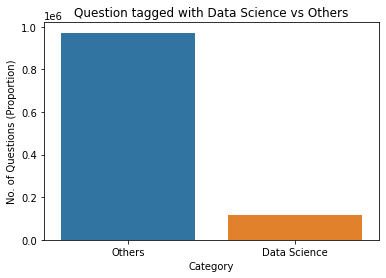

In [ ]:
sns.countplot(data=cap_ques_df, x='Datascience')
plt.title('Question tagged with Data Science vs Others')
plt.xlabel('Category')
plt.ylabel('No. of Questions (Proportion)')
plt.xticks([0,1], labels=['Others','Data Science'])
plt.show()

In [ ]:
#Tags by tag name and question count
tags_by_tag_name_df = tags_df.groupby('Tag').agg({'Id':'count','Datascience':'first'}).sort_values(by='Id', ascending=False).reset_index()
tags_by_tag_name_df.head()

,Tag,Id,Datascience
0,javascript,124155,0
1,java,115212,0
2,c#,101186,0
3,php,98808,0
4,android,90659,0


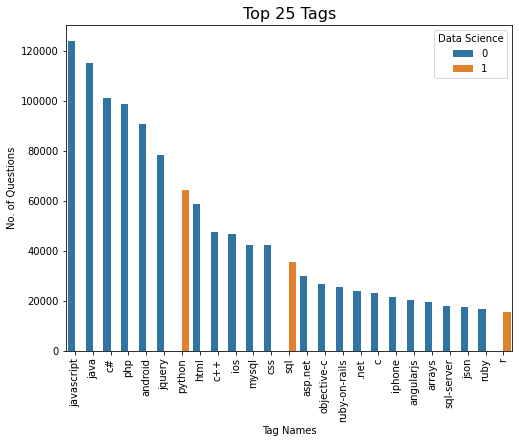

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=tags_by_tag_name_df.head(25), x='Tag', y='Id', hue='Datascience')
plt.title('Top 25 Tags',fontsize=16)
plt.xlabel('Tag Names')
plt.ylabel('No. of Questions')
plt.xticks(rotation=90)
plt.legend(loc='upper right', title='Data Science')
plt.show()

*Only 3 tags out of top 25 are related to data science*

**Tag analysis by time taken to get an answer.**

In [ ]:
cap_ques_df['Id'].count()

1088427

In [ ]:
tags_df['Id'].count()

3749881

In [ ]:
tag_time_df = pd.merge(left=tags_df, right=cap_ques_df[['Id','avgTime(Hr)','minTime(Hr)',	'maxTime(Hr)']], on='Id', how='inner')
tag_time_df.loc[:,'Datascience'] = tag_time_df.Tag.apply(lambda x:isRelatedToDs(x))
tag_time_df.head(3)

,Id,Tag,Datascience,avgTime(Hr),minTime(Hr),maxTime(Hr)
0,120,sql,1,1278.85,1278.85,1278.85
1,120,asp.net,0,1278.85,1278.85,1278.85
2,120,sitemap,0,1278.85,1278.85,1278.85


In [ ]:
#check null entry
tag_time_df.isnull().sum()

Id             0
Tag            0
Datascience    0
avgTime(Hr)    0
minTime(Hr)    0
maxTime(Hr)    0
dtype: int64

In [ ]:
#Grouping and standardising precision for hours
tag_time_ds_df = tag_time_df[tag_time_df.Datascience == 1].copy()
tag_time_est_df = tag_time_ds_df.groupby('Tag')[['minTime(Hr)','maxTime(Hr)','avgTime(Hr)']].mean().reset_index()
tag_time_est_df.loc[:,'minTime(Hr)'] = tag_time_est_df['minTime(Hr)'].apply(lambda x:round(x, 2))
tag_time_est_df.loc[:,'maxTime(Hr)'] = tag_time_est_df['maxTime(Hr)'].apply(lambda x:round(x, 2))
tag_time_est_df.loc[:,'avgTime(Hr)'] = tag_time_est_df['avgTime(Hr)'].apply(lambda x:round(x, 2))
tag_time_est_df

,Tag,minTime(Hr),maxTime(Hr),avgTime(Hr)
0,excel,241.72,1474.85,1474.85
1,matlab,204.91,1201.46,1201.46
2,python,224.24,1569.99,1569.99
3,r,222.46,1086.06,1086.06
4,sas,106.44,903.90,903.90
5,sql,92.09,1018.61,1018.61


In [ ]:
tag_time_est_df.isnull().sum()

Tag            0
minTime(Hr)    0
maxTime(Hr)    0
avgTime(Hr)    0
dtype: int64

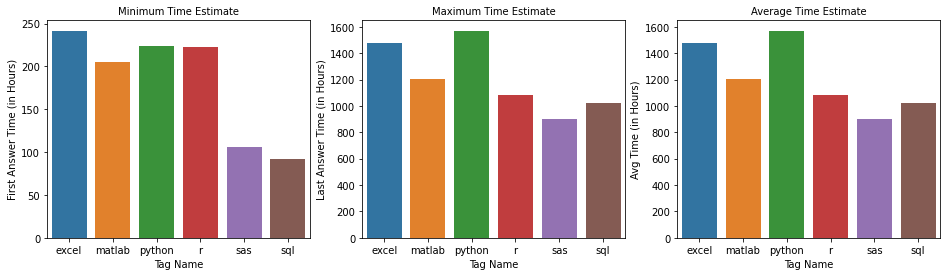

In [ ]:
plt.figure(figsize=(16, 4))

plt.subplot(1,3,1)
sns.barplot(data=tag_time_est_df, y='minTime(Hr)',x='Tag')
plt.title('Minimum Time Estimate', fontsize=10)
plt.ylabel('First Answer Time (in Hours)',fontsize=10)
plt.xlabel('Tag Name', fontsize=10)

plt.subplot(1,3,2)
sns.barplot(data=tag_time_est_df, y='maxTime(Hr)',x='Tag')
plt.title('Maximum Time Estimate', fontsize=10)
plt.ylabel('Last Answer Time (in Hours)',fontsize=10)
plt.xlabel('Tag Name', fontsize=10)

plt.subplot(1,3,3)
sns.barplot(data=tag_time_est_df, x='Tag', y='avgTime(Hr)')
plt.title('Average Time Estimate', fontsize=10)
plt.ylabel('Avg Time (in Hours)',fontsize=10)
plt.xlabel('Tag Name', fontsize=10)

plt.show()


- With respect for first answer, sql and sas is taking less time than other tags and time taken by excel is the highest
- With respect to last answer received, sas and sql again has edge over others
- With respect to avg time taken to get an answer, sas is the least and sql is the second least.

**Observations**

- Question having tags **sas** and **sql** have tendency to get the answer fast.
- Questions tagged with **excel** and **python** takes more time to get the answer.



----

**Number of unique users and questions associated with each tag**

In [ ]:
tags_by_users_df = pd.merge(left=tags_df, right=cap_ques_df[['Id','OwnerUserId']], on='Id').reset_index()

In [ ]:
unique_users_by_tag_df = tags_by_users_df.groupby('Tag')\
.agg({'OwnerUserId':'nunique','Id':'nunique','Datascience':'first'})\
.rename(columns={'OwnerUserId':'Users','Id':'Questions'})\
.sort_values(by='Users', ascending=False)\
.reset_index()
unique_users_by_tag_df.head()

,Tag,Users,Questions,Datascience
0,javascript,77191,107460,0
1,java,70478,99387,0
2,php,60235,86762,0
3,c#,55212,88745,0
4,jquery,48962,69389,0


In [ ]:
#null entry check
unique_users_by_tag_df.isnull().sum()

Tag            0
Users          0
Questions      0
Datascience    0
dtype: int64

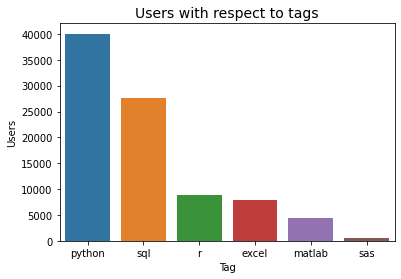

In [ ]:
plt.title('Users with respect to tags', fontsize=14)
sns.barplot(data=unique_users_by_tag_df[unique_users_by_tag_df.Datascience==1], x='Tag', y='Users')
plt.show()

**Observations**
- Python tag has highest number of unique users associated with it.
- sql tag has second highest no of users.
- sas has the least number of users followed by matlab

---------

**Create estimated time to get an answer buckets**

In [ ]:
max(cap_ques_df['avgTime(Hr)']), max(cap_ques_df['minTime(Hr)'])

(70747.46, 70181.62)

In [ ]:
max_avg_time = max(cap_ques_df['avgTime(Hr)'])
max_min_time = max(cap_ques_df['minTime(Hr)'])

#We took -1 as starting point for bucket as it will consider 0 as well for bucketing

cap_ques_df['AVG_Time_Slot'] = pd.cut(x=cap_ques_df['avgTime(Hr)'],\
                                      bins=[-1, 1, 24, 72, 168, max_avg_time],\
                                      labels=['within an hour', 'within a day', 'within 3 days', 'within a Week', 'more than a week'])

cap_ques_df['Min_Time_Slot'] = pd.cut(x=cap_ques_df['minTime(Hr)'],\
                                      bins=[-1, 1, 24, 72, 168, max_min_time],\
                                      labels=['within an hour', 'within a day', 'within 3 days', 'within a Week', 'more than a week'])

---------

In [ ]:
#check null entry
cap_ques_df.isnull().sum()

Id               0
OwnerUserId      0
Score            0
Title            0
Answers          0
Tags             0
FA_Usr           0
FA_Score         0
LA_Usr           0
LA_Score         0
Closed           0
minTime(Hr)      0
maxTime(Hr)      0
avgTime(Hr)      0
Datascience      0
AVG_Time_Slot    0
Min_Time_Slot    0
dtype: int64

**Time slot vs Number of questions fall under it**

In [ ]:
ques_by_avg_time_df = cap_ques_df\
.groupby("AVG_Time_Slot").agg({'Id':'nunique'})\
.reset_index()\
.rename(columns={'AVG_Time_Slot':'Average Time','Id':'Questions'})\
.sort_values(by='Questions', ascending=False)
ques_by_avg_time_df.head()

,Average Time,Questions
0,within an hour,509849
1,within a day,305873
4,more than a week,182997
2,within 3 days,57182
3,within a Week,32526


In [ ]:
ques_by_min_time_df = cap_ques_df\
.groupby("Min_Time_Slot").agg({'Id':'nunique'})\
.reset_index()\
.rename(columns={'Min_Time_Slot':'Minimum Time','Id':'Questions'})\
.sort_values(by='Questions', ascending=False)
ques_by_min_time_df.head()

,Minimum Time,Questions
0,within an hour,682021
1,within a day,256150
4,more than a week,80985
2,within 3 days,43912
3,within a Week,25359


In [ ]:
ques_by_time_df = pd.merge(left=ques_by_min_time_df, \
         right=ques_by_avg_time_df, \
         how='inner', \
         left_on='Minimum Time', \
         right_on='Average Time') \
         .drop('Average Time', axis=1)

ques_by_time_df.columns = ['TimeSlot','Ques(InMinTime)','Ques(InAvgTime)']
ques_by_time_df.head(3)

,TimeSlot,Ques(InMinTime),Ques(InAvgTime)
0,within an hour,682021,509849
1,within a day,256150,305873
2,more than a week,80985,182997


In [ ]:
ques_by_time_df.isnull().sum()

TimeSlot           0
Ques(InMinTime)    0
Ques(InAvgTime)    0
dtype: int64

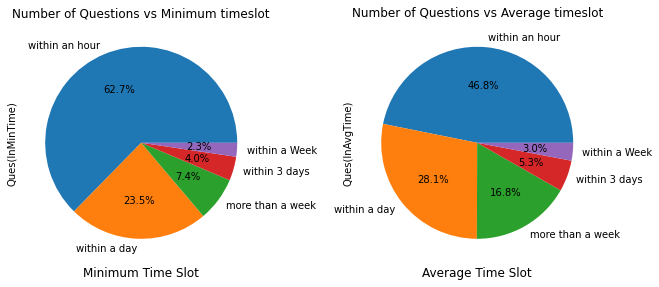

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
ques_by_time_df.set_index(keys=['TimeSlot'])['Ques(InMinTime)'].plot.pie(autopct="%.1f%%");
plt.title('Number of Questions vs Minimum timeslot', fontsize=12)
plt.xlabel('Minimum Time Slot', fontsize=12)

plt.subplot(1,2,2)
ques_by_time_df.set_index(keys=['TimeSlot'])['Ques(InAvgTime)'].plot.pie(autopct="%.1f%%");
plt.title('Number of Questions vs Average timeslot', fontsize=12)
plt.xlabel('Average Time Slot', fontsize=12)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

**Observations For total number of questions (minimum timeslot)**
- 62% of the questions are answered within an hour
- 23% of the questions are answered within a day
- 7% of the questions takes more than a week to get the answer.

**Observations For total number of questions (average timeslot)**
- 47% questions are answered within an hour
- 28% questions are answered within a day
- and 16% of the questions takes more than a week to get an answer



-----

**Let's analyse the same for datascience questions**

In [ ]:
ds_df = cap_ques_df[cap_ques_df.Datascience==1].copy()

In [ ]:
ds_ques_by_avg_time_df = ds_df\
.groupby("AVG_Time_Slot").agg({'Id':'nunique'})\
.reset_index()
ds_ques_by_avg_time_df.head()

,AVG_Time_Slot,Id
0,within an hour,61634
1,within a day,33588
2,within 3 days,4781
3,within a Week,2517
4,more than a week,13656


In [ ]:
ds_ques_by_min_time_df = ds_df\
.groupby("Min_Time_Slot").agg({'Id':'nunique'})\
.reset_index()
ds_ques_by_min_time_df.head()

,Min_Time_Slot,Id
0,within an hour,81227
1,within a day,24602
2,within 3 days,3226
3,within a Week,1705
4,more than a week,5416


In [ ]:
ds_ques_by_time_df = pd.merge(left=ds_ques_by_min_time_df, \
         right=ds_ques_by_avg_time_df, \
         how='inner', \
         left_on='Min_Time_Slot', \
         right_on='AVG_Time_Slot') \
         .drop('AVG_Time_Slot', axis=1)

ds_ques_by_time_df.columns = ['TimeSlot','Ques(InMinTime)','Ques(InAvgTime)']
ds_ques_by_time_df.head(3)

,TimeSlot,Ques(InMinTime),Ques(InAvgTime)
0,within an hour,81227,61634
1,within a day,24602,33588
2,within 3 days,3226,4781


In [ ]:
ds_ques_by_time_df.isnull().sum()

TimeSlot           0
Ques(InMinTime)    0
Ques(InAvgTime)    0
dtype: int64

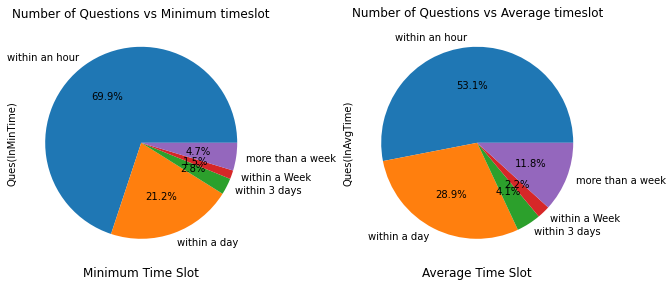

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
ds_ques_by_time_df.set_index(keys=['TimeSlot'])['Ques(InMinTime)'].plot.pie(autopct="%.1f%%");
plt.title('Number of Questions vs Minimum timeslot', fontsize=12)
plt.xlabel('Minimum Time Slot', fontsize=12)

plt.subplot(1,2,2)
ds_ques_by_time_df.set_index(keys=['TimeSlot'])['Ques(InAvgTime)'].plot.pie(autopct="%.1f%%");
plt.title('Number of Questions vs Average timeslot', fontsize=12)
plt.xlabel('Average Time Slot', fontsize=12)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

**Observations For total number of questions (minimum timeslot)**
- 70% of the questions are answered within an hour
- 21% of the questions are answered within a day
- 4.7% of the questions takes more than a week to get the answer.

**Observations For total number of questions (average timeslot)**
- 53% questions are answered within an hour
- 29% questions are answered within a day
- and 11% of the questions takes more than a week to get an answer

------

In [ ]:
ds_ques_by_score_df = cap_ques_df[cap_ques_df.Datascience == 1].sort_values(by='Score', ascending=False)

**Get 25 highest scored Data Science Questions**

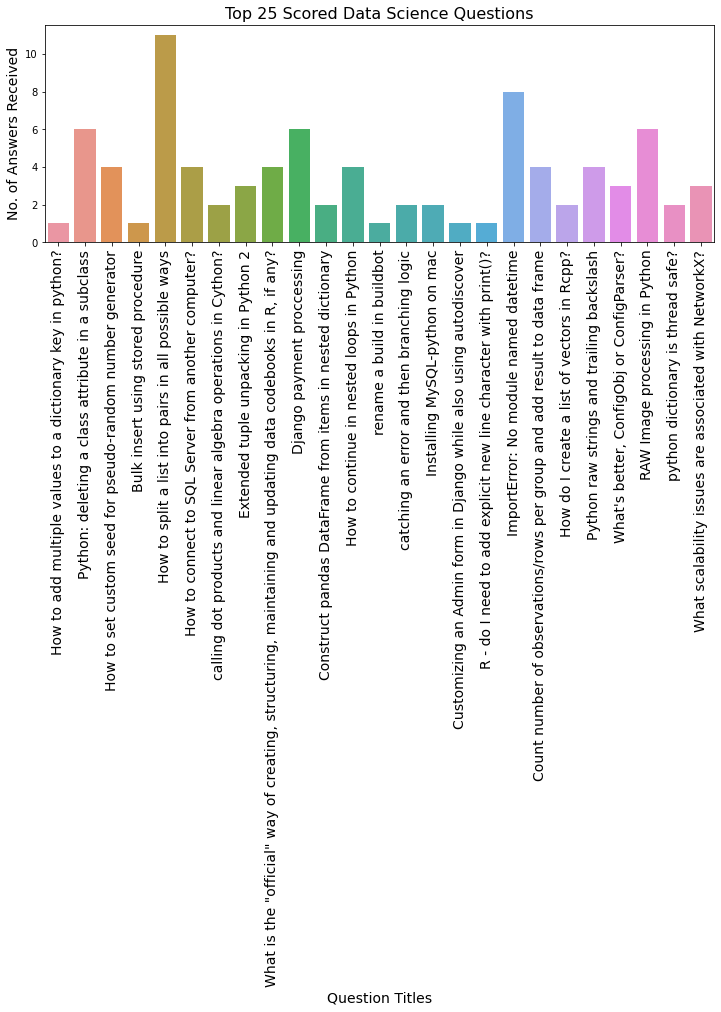

In [ ]:
plt.figure(figsize=(12, 4))
sns.barplot(data=ds_ques_by_score_df.head(25), x='Title', y='Answers')
plt.title('Top 25 Scored Data Science Questions', fontsize=16)
plt.xlabel('Question Titles', fontsize=14)
plt.ylabel('No. of Answers Received', fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

**Merge users dataset with questions dataset** (As we are analysing question, we only need display name and reputation(if needed) of the user)

In [ ]:
#add username and reputation for question users
ques_user_df = pd.merge(left=cap_ques_df,\
                        right=cap_users_df[['id','display_name', 'reputation']], \
                        how='inner', \
                        left_on='OwnerUserId', \
                        right_on='id').drop('id', axis=1)

#add username and reputation for answer users
ques_user_df = pd.merge(left=ques_user_df,\
                        right=cap_users_df[['id','display_name', 'reputation']], \
                        how='inner', \
                        left_on='FA_Usr', \
                        right_on='id', \
                        suffixes=('','_FA')).drop('id', axis=1)
                      
ques_user_df.head(3)                    

,Id,OwnerUserId,Score,Title,Answers,Tags,FA_Usr,FA_Score,LA_Usr,LA_Score,Closed,minTime(Hr),maxTime(Hr),avgTime(Hr),Datascience,AVG_Time_Slot,Min_Time_Slot,display_name,reputation,display_name_FA,reputation_FA
0,470,71.0,13,Homegrown consumption of web services,1,"(.net, web-services)",49.0,8,49.0,8,1,0.36,0.36,0.36,0,within an hour,within an hour,Dillie-O,24223,Leon Bambrick,18146
1,12290,2099426.0,6,Considering N2 CMS but worried about performan...,5,"(asp.net, performance, .net-3.5, content-manag...",49.0,3,8542.0,1,0,82.91,25270.33,25270.33,0,more than a week,within a Week,Adrian Magdas,478,Leon Bambrick,18146
2,150010,71.0,3,How do I persist a ByRef variable into .net wi...,5,"(.net, winforms, reference, modal-dialog)",20363.0,4,0.0,0,0,0.09,24.26,24.26,0,within 3 days,within an hour,Dillie-O,24223,OregonGhost,20867


In [ ]:
ques_user_df.isnull().sum()

Id                 0
OwnerUserId        0
Score              0
Title              0
Answers            0
Tags               0
FA_Usr             0
FA_Score           0
LA_Usr             0
LA_Score           0
Closed             0
minTime(Hr)        0
maxTime(Hr)        0
avgTime(Hr)        0
Datascience        0
AVG_Time_Slot      0
Min_Time_Slot      0
display_name       0
reputation         0
display_name_FA    0
reputation_FA      0
dtype: int64

### Top Users
- By No. Of Data Science Question Asked
- By high scored question posted
- By high scored first answer posted

**Top users by no. of Data Science questions asked**

In [ ]:
users_by_ds_ques_asked_df = ques_user_df[ques_user_df.Datascience == 1]\
.groupby(['OwnerUserId','display_name','reputation'])[['Id']]\
.count().sort_values(by='Id', ascending=False).reset_index()

users_by_ds_ques_asked_df.columns = ['userId','userName','userRepo','quesAsked']
users_by_ds_ques_asked_df.head()

,userId,userName,userRepo,quesAsked
0,308827.0,user308827,3120,23
1,1107049.0,alphanumeric,5890,22
2,1592380.0,user61629,10017,19
3,1342109.0,Shiva Krishna Bavandla,8791,18
4,1052117.0,Mittenchops,7185,15


In [ ]:
users_by_ds_ques_asked_df.isnull().sum()

userId       0
userName     0
userRepo     0
quesAsked    0
dtype: int64

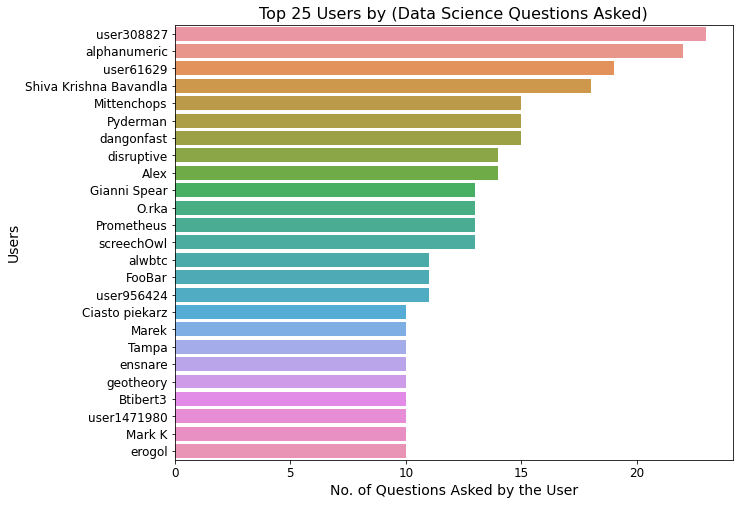

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=users_by_ds_ques_asked_df.head(25), y='userName', x='quesAsked')
plt.title('Top 25 Users by (Data Science Questions Asked)', fontsize=16)
plt.xlabel('No. of Questions Asked by the User', fontsize=14)
plt.ylabel('Users', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Get Top Users who posted highest scored data science questions**

In [ ]:
ds_ques_by_score_df = ques_user_df[ques_user_df.Datascience == 1].sort_values(by='Score', ascending=False)

In [ ]:
ds_ques_by_score_df.isnull().sum()

Id                 0
OwnerUserId        0
Score              0
Title              0
Answers            0
Tags               0
FA_Usr             0
FA_Score           0
LA_Usr             0
LA_Score           0
Closed             0
minTime(Hr)        0
maxTime(Hr)        0
avgTime(Hr)        0
Datascience        0
AVG_Time_Slot      0
Min_Time_Slot      0
display_name       0
reputation         0
display_name_FA    0
reputation_FA      0
dtype: int64

In [ ]:
top_ds_users_by_score = ds_ques_by_score_df[['display_name','Min_Time_Slot','reputation']].head(25)

In [ ]:
top_ds_users_by_score.head(3)

,display_name,Min_Time_Slot,reputation
215984,joshayers,within an hour,1503
66319,Neil G,within an hour,15320
1138,Staale,within a Week,17900


In [ ]:
top_ds_users_by_score.isnull().sum()

display_name     0
Min_Time_Slot    0
reputation       0
dtype: int64

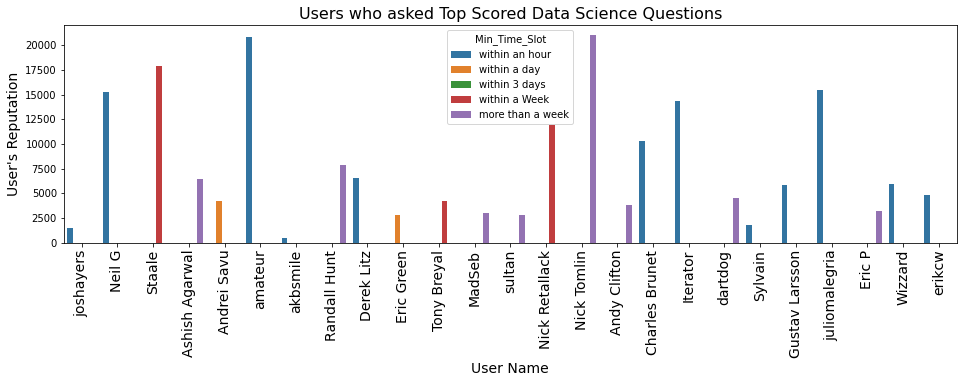

In [ ]:
plt.figure(figsize=(16, 4))
sns.barplot(data=top_ds_users_by_score.head(25), x='display_name', y='reputation',  hue='Min_Time_Slot')
plt.title('Users who asked Top Scored Data Science Questions', fontsize=16)
plt.xlabel('User Name', fontsize=14)
plt.ylabel('User\'s Reputation', fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

- These types of top users when raise data science related questions should receive notification. 

- A significant amount of users got response within an hour or within a day.

- Few questions took more than a week to get an answer.

**Get Top Users who has given first answer to the high scored data science question**

In [ ]:
ds_firstans_by_score_df = ques_user_df[ques_user_df.Datascience == 1].sort_values(by='FA_Score', ascending=False)

In [ ]:
top_ds_users_by_fa_score = ds_firstans_by_score_df[['display_name_FA','Min_Time_Slot','reputation_FA']].head(25).copy()

In [ ]:
top_ds_users_by_fa_score.head(3)

,display_name_FA,Min_Time_Slot,reputation_FA
37883,brool,within an hour,1895
40727,dash-tom-bang,within an hour,14745
210570,stormlifter,within a day,2808


In [ ]:
top_ds_users_by_fa_score.isnull().sum()

display_name_FA    0
Min_Time_Slot      0
reputation_FA      0
dtype: int64

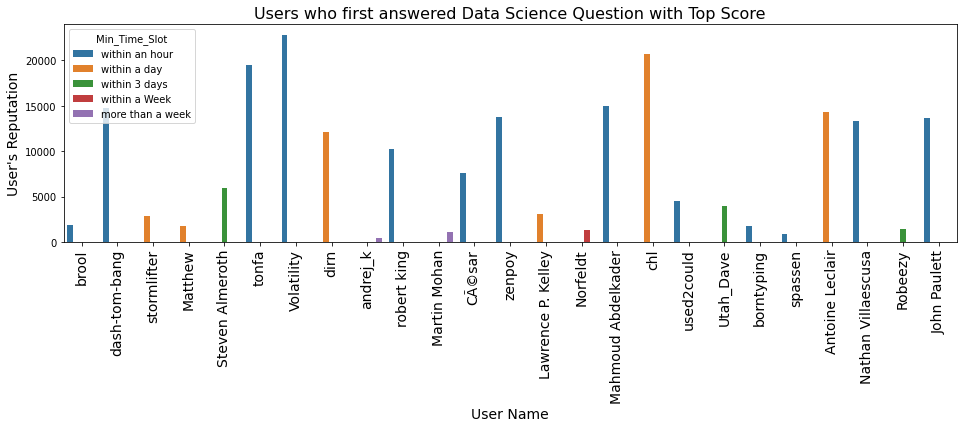

In [ ]:
plt.figure(figsize=(16, 4))
sns.barplot(data=top_ds_users_by_fa_score.head(25), x='display_name_FA', y='reputation_FA',  hue='Min_Time_Slot')
plt.title('Users who first answered Data Science Question with Top Score', fontsize=16)
plt.xlabel('User Name', fontsize=14)
plt.ylabel('User\'s Reputation', fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

----

- We have extracted relevant information from **cap_ans_df** and incorporated within **cap_ques_df**
- **cap_ques_df** and **cap_users_df** have merged to form **ques_user_df**
- Now we have following informative datasets
   - unique_users_by_tag_df
   - tag_time_est_df
   - derived_ans_df
   - ques_by_time_df
   - ds_ques_by_time_df
   - users_by_ds_ques_asked_df
   - top_ds_users_by_score
   - top_ds_users_by_fa_score

-----

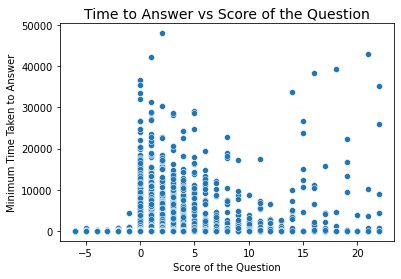

In [ ]:
plt.title('Time to Answer vs Score of the Question', fontsize=14)
plt.ylabel('Minimum Time Taken to Answer')
plt.xlabel('Score of the Question')
sns.scatterplot(data=ques_user_df[ques_user_df.Datascience == 1], x='Score', y='minTime(Hr)')
plt.show()

No Correlation

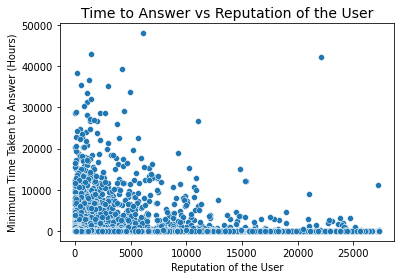

In [ ]:
plt.title('Time to Answer vs Reputation of the User', fontsize=14)
plt.ylabel('Minimum Time Taken to Answer (Hours)')
plt.xlabel('Reputation of the User')
sns.scatterplot(data=ques_user_df[ques_user_df.Datascience == 1], x='reputation', y='minTime(Hr)')
plt.show()

No Correlation

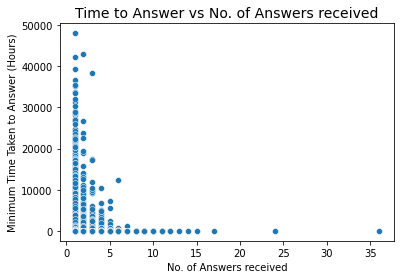

In [ ]:
plt.title('Time to Answer vs No. of Answers received', fontsize=14)
plt.ylabel('Minimum Time Taken to Answer (Hours)')
plt.xlabel('No. of Answers received')
sns.scatterplot(data=ques_user_df[ques_user_df.Datascience == 1], x='Answers', y='minTime(Hr)')
plt.show()

No Correlation

Let's create another derived metric that is tags count

In [ ]:
ques_user_df['TagsCount'] = ques_user_df.Tags.apply(lambda x:len(x))
ques_user_df[['Tags','TagsCount']].head()

,Tags,TagsCount
0,"(.net, web-services)",2
1,"(asp.net, performance, .net-3.5, content-manag...",5
2,"(.net, winforms, reference, modal-dialog)",4
3,"(c#, .net, generics)",3
4,"(image, 2d, file-format, sprite)",4


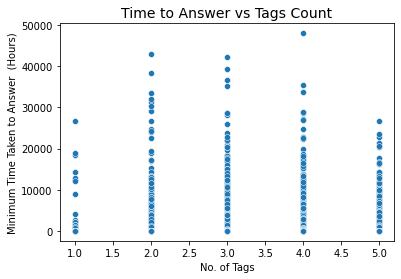

In [ ]:
plt.title('Time to Answer vs Tags Count', fontsize=14)
plt.ylabel('Minimum Time Taken to Answer  (Hours)')
plt.xlabel('No. of Tags')
sns.scatterplot(data=ques_user_df[ques_user_df.Datascience == 1], x='TagsCount', y='minTime(Hr)')
plt.show()

No Correlation

#### 3.2 Multi-Variate Analysis

In [ ]:
corr = ques_user_df.corr()
round(corr,2)

,Id,OwnerUserId,Score,Answers,FA_Usr,FA_Score,LA_Usr,LA_Score,Closed,minTime(Hr),maxTime(Hr),avgTime(Hr),Datascience,reputation,reputation_FA,TagsCount
Id,1.00,0.63,-0.22,-0.22,0.64,-0.18,0.58,-0.16,-0.01,-0.07,-0.24,-0.24,0.05,-0.24,-0.21,0.04
OwnerUserId,0.63,1.00,-0.19,-0.11,0.60,-0.15,0.60,-0.14,0.01,-0.06,-0.16,-0.16,0.05,-0.34,-0.20,0.04
Score,-0.22,-0.19,1.00,0.32,-0.16,0.50,-0.09,0.42,-0.03,0.11,0.37,0.37,0.01,0.16,0.09,0.04
Answers,-0.22,-0.11,0.32,1.00,-0.12,0.11,-0.04,-0.01,0.04,-0.08,0.37,0.37,0.01,0.09,0.10,-0.03
FA_Usr,0.64,0.60,-0.16,-0.12,1.00,-0.15,0.76,-0.13,-0.00,0.03,-0.13,-0.13,0.05,-0.21,-0.31,0.03
FA_Score,-0.18,-0.15,0.50,0.11,-0.15,1.00,-0.09,0.56,0.02,-0.02,0.19,0.19,0.01,0.13,0.15,-0.02
LA_Usr,0.58,0.60,-0.09,-0.04,0.76,-0.09,1.00,-0.16,-0.01,0.03,0.09,0.09,0.04,-0.20,-0.24,0.03
LA_Score,-0.16,-0.14,0.42,-0.01,-0.13,0.56,-0.16,1.00,0.03,-0.03,-0.04,-0.04,0.01,0.12,0.11,-0.01
Closed,-0.01,0.01,-0.03,0.04,-0.00,0.02,-0.01,0.03,1.00,-0.02,-0.02,-0.02,0.01,0.00,0.01,-0.03
minTime(Hr),-0.07,-0.06,0.11,-0.08,0.03,-0.02,0.03,-0.03,-0.02,1.00,0.32,0.32,-0.01,0.02,-0.07,0.01


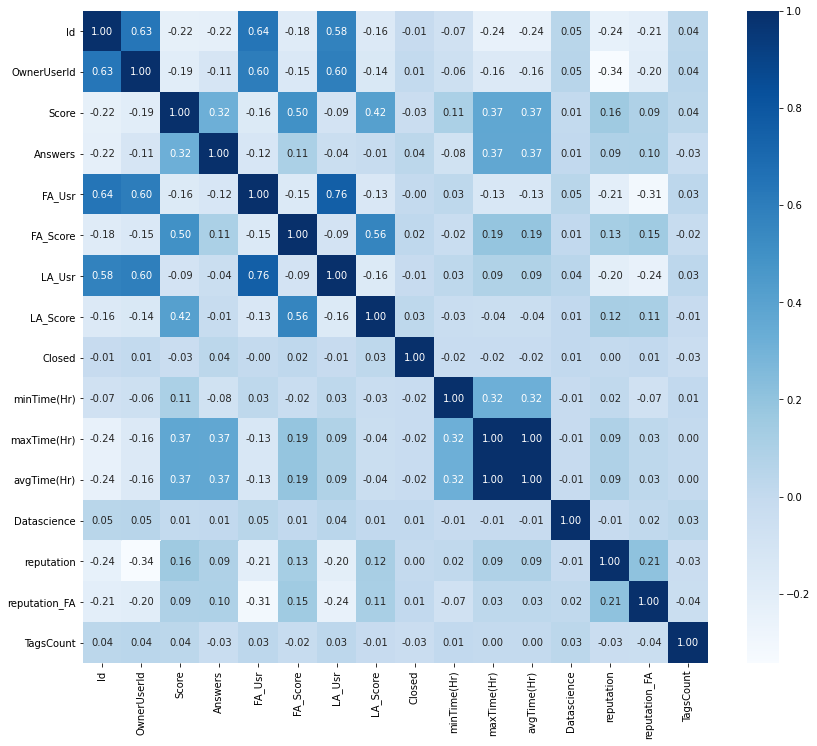

In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(data=corr, annot=True, fmt='0.2f', cmap='Blues')
plt.show()

Observations
- Question owner id has good correlation with 
  - question Id
  - first answer user id
  - last answer user id
- Question Score has good correlation with 
  - first answer score
  - last answer score 
- No of answers has weak correlation with
  - score of the question
  - avg time taken to answer
  - max time taken to answer
- First answer score depends on 
  - Question score
- Last answer score also depends on
  - Question score
- First answer user has correlation with Last answer user




------

### 4. Store Results to RDS

- Top 25 tags (irrespective of data science tag)
- Data science tags with estimate time
- Time Factors for data science questions
- Number of unique users for data science tags
- Top users with high scored data science questions
- Top users with high scored first answer for data science questions

In [ ]:
rds_top_tags = tags_by_tag_name_df.head(25).copy()
rds_top_tags.head()

,Tag,Id,Datascience
0,javascript,124155,0
1,java,115212,0
2,c#,101186,0
3,php,98808,0
4,android,90659,0


In [ ]:
rds_top_tags.isnull().sum()

Tag            0
Id             0
Datascience    0
dtype: int64

In [ ]:
rds_tag_time_df = tag_time_est_df.copy()
rds_tag_time_df

,Tag,minTime(Hr),maxTime(Hr),avgTime(Hr)
0,excel,241.72,1474.85,1474.85
1,matlab,204.91,1201.46,1201.46
2,python,224.24,1569.99,1569.99
3,r,222.46,1086.06,1086.06
4,sas,106.44,903.90,903.90
5,sql,92.09,1018.61,1018.61


In [ ]:
rds_tag_time_df.isnull().sum()

Tag            0
minTime(Hr)    0
maxTime(Hr)    0
avgTime(Hr)    0
dtype: int64

In [ ]:
rds_ques_timefactor_df = ds_ques_by_time_df.copy()
rds_ques_timefactor_df.columns = ['Time_Estimate', 'No._of_Questions(min_time_est)', 'No._of_Questions(avg_time_est)']
rds_ques_timefactor_df.head()

,Time_Estimate,No._of_Questions(min_time_est),No._of_Questions(avg_time_est)
0,within an hour,81227,61634
1,within a day,24602,33588
2,within 3 days,3226,4781
3,within a Week,1705,2517
4,more than a week,5416,13656


In [ ]:
rds_ques_timefactor_df.isnull().sum()

Time_Estimate                     0
No._of_Questions(min_time_est)    0
No._of_Questions(avg_time_est)    0
dtype: int64

In [ ]:
rds_unique_users_tag_df = unique_users_by_tag_df[unique_users_by_tag_df.Datascience == 1].drop('Datascience', axis=1).copy()
rds_unique_users_tag_df

,Tag,Users,Questions
7,python,40044,56210
11,sql,27685,33230
31,r,8809,13065
33,excel,7938,8857
66,matlab,4333,5505
749,sas,489,641


In [ ]:
rds_users_by_ques_df = top_ds_users_by_score.head(25).copy()
rds_users_by_ques_df.columns = ['User_name','Time_Slot(min)','User_Repo']
rds_users_by_ques_df.head()

,User_name,Time_Slot(min),User_Repo
215984,joshayers,within an hour,1503
66319,Neil G,within an hour,15320
1138,Staale,within a Week,17900
149078,Ashish Agarwal,more than a week,6477
1155,Andrei Savu,within a day,4196


In [ ]:
rds_users_by_ques_df.isnull().sum()

User_name         0
Time_Slot(min)    0
User_Repo         0
dtype: int64

In [ ]:
rds_users_by_fans_df = top_ds_users_by_fa_score.head(25).copy()
rds_users_by_fans_df.columns = ['User_name','Time_Slot(min)','User_Repo']
rds_users_by_fans_df.head()

,User_name,Time_Slot(min),User_Repo
37883,brool,within an hour,1895
40727,dash-tom-bang,within an hour,14745
210570,stormlifter,within a day,2808
290160,Matthew,within a day,1788
32265,Steven Almeroth,within 3 days,5953


In [ ]:
rds_users_by_fans_df.isnull().sum()

User_name         0
Time_Slot(min)    0
User_Repo         0
dtype: int64

In [ ]:
from google.colab import files

class StoreCSV:
  def __init__(self, rds_top_tags, \
               rds_tag_time_df, \
               rds_ques_timefactor_df, \
               rds_unique_users_tag_df, \
               rds_users_by_ques_df, \
               rds_users_by_fans_df):
    
    self.TOP_TAGS = rds_top_tags
    self.TAG_TIME = rds_tag_time_df
    self.ANS_TIME = rds_ques_timefactor_df
    self.TAG_USERS = rds_unique_users_tag_df
    self.OWNERS = rds_users_by_ques_df
    self.RESPONDERS = rds_users_by_fans_df

    self.TOP_TAG_CSV = 'RDSTopTags.csv'
    self.TAG_TIME_CSV = 'RDSTagTime.csv'
    self.ANS_TIME_CSV = 'RDSTimeFact.csv'
    self.TAG_USERS_CSV = 'RDSUniqueUsers.csv'
    self.OWNERS_CSV = 'RDSUserByQues.csv'
    self.RESPONDERS_CSV = 'RDSUserByFAns.csv'

  def store(self):
    self.TOP_TAGS.to_csv(self.TOP_TAG_CSV, index=False)
    self.TAG_TIME.to_csv(self.TAG_TIME_CSV, index=False)
    self.ANS_TIME.to_csv(self.ANS_TIME_CSV, index=False)
    self.TAG_USERS.to_csv(self.TAG_USERS_CSV, index=False)
    self.OWNERS.to_csv(self.OWNERS_CSV, index=False)
    self.RESPONDERS.to_csv(self.RESPONDERS_CSV, index=False)

  def downloadResults(self):
    #Download results
    self.store()

    files.download(self.TOP_TAG_CSV)
    files.download(self.TAG_TIME_CSV)
    files.download(self.ANS_TIME_CSV)
    files.download(self.TAG_USERS_CSV)
    files.download(self.OWNERS_CSV)
    files.download(self.RESPONDERS_CSV)

In [ ]:
store = StoreCSV(rds_top_tags, \
               rds_tag_time_df, \
               rds_ques_timefactor_df, \
               rds_unique_users_tag_df, \
               rds_users_by_ques_df, \
               rds_users_by_fans_df)

In [ ]:
#download results
store.downloadResults()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

-------------------

------------------------ End Of Assignment ------------------------